<h1> Лабораторная работа №4</h1>
<p>Выполнил студент гр. КИ21-17/1б Самарин Никита</p>

## Цель: знакомство с методами анализа текстовых данных в рамках решения задачи анализа текстовых данных, формирование навыков выполнения анализа данных на языке Python.
### Задачи:
Выполнение практической работы предполагает решение следующий задач:
1. Подготовка исходных данных
2. Обучение базовых моделей классификации
3. Оценка качества построенных моделей на тестовой выборке
<p>Общая последовательность действий<p>

1. Выполнить предварительную обработку текстовых данных.
2. Провести векторицацию текста с помощью «мешок слов», TF-IDF и Word2Vec.
3. Реализовать базовые алгоритмы классификации (наивный байесовский классификатор, SVM, деревья решений, ансамбли).
4. Провести валидацию моделей на текстовых данных и сравнить результаты от методов векторизации.
5. Реализовать подход на основе тонального словаря. Сравнить данный подход с подходами на основе машинного обучения
6. Сделать выводы по результатам проведенных исследований

#### Подготовка исходных данных

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import openpyxl

df = pd.read_excel('doc_comment_summary.xlsx', names=["text", "tonality"], header=None)

In [2]:
df.head()

,text,tonality
0,Но при мужчине ни одна приличная женщина не по...,-1
1,Украина это часть Руси искусственно отделенная...,-1
2,Как можно говорить об относительно небольшой к...,-1
3,1.2014. а что они со своими поляками сделали?...,0
4,у а фильмы... Зрители любят диковинное. у ме...,0


In [3]:
df.isnull().sum().reset_index()

,index,0
0,text,75
1,tonality,23


In [4]:
df.dropna(inplace=True)
df.isnull().sum().reset_index()

,index,0
0,text,0
1,tonality,0


In [5]:
df

,text,tonality
0,Но при мужчине ни одна приличная женщина не по...,-1
1,Украина это часть Руси искусственно отделенная...,-1
2,Как можно говорить об относительно небольшой к...,-1
3,1.2014. а что они со своими поляками сделали?...,0
4,у а фильмы... Зрители любят диковинное. у ме...,0
...,...,...
26868,Многих заставляют. Многие сами проявляют излиш...,-1
26869,Очередной Чубайс. ну а чего нового то? Сорос ...,-1
26870,"Закон, как все предыдущие - абсолютный бред и ...",0
26871,дело которое ты делаешь сейчас - оно очень хор...,0


In [6]:
df = df[df['tonality'].isin([-2, -1, 0, 1, 2]) == True]
df['tonality'].unique()

array([-1, 0, 1, -2, 2], dtype=object)

Index([0, -1, 1, -2, 2], dtype='object', name='tonality') [13858  9201  1794  1534   365]


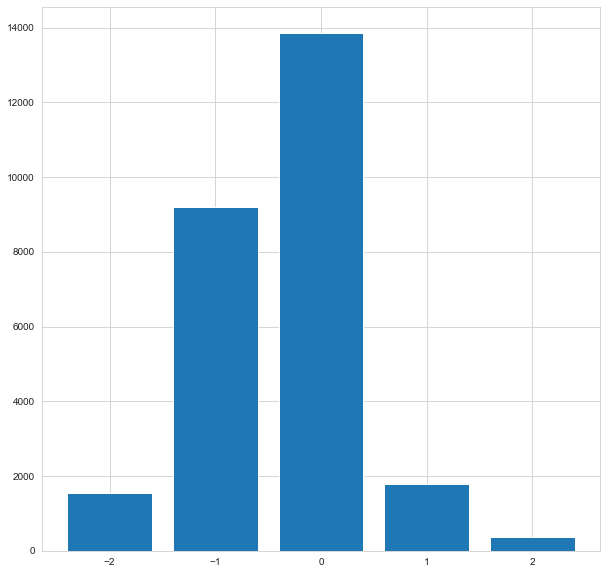

In [7]:
plt.figure(figsize = (10,10) )
b = df['tonality'].value_counts()
print(b.index, b.values)
plt.bar(b.index, b.values)
plt.show()

In [8]:
df['tonality'] = df['tonality'].apply(lambda x:str(x))
df

C:\Users\yormu\AppData\Local\Temp\ipykernel_27476\1516878879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tonality'] = df['tonality'].apply(lambda x:str(x))


,text,tonality
0,Но при мужчине ни одна приличная женщина не по...,-1
1,Украина это часть Руси искусственно отделенная...,-1
2,Как можно говорить об относительно небольшой к...,-1
3,1.2014. а что они со своими поляками сделали?...,0
4,у а фильмы... Зрители любят диковинное. у ме...,0
...,...,...
26868,Многих заставляют. Многие сами проявляют излиш...,-1
26869,Очередной Чубайс. ну а чего нового то? Сорос ...,-1
26870,"Закон, как все предыдущие - абсолютный бред и ...",0
26871,дело которое ты делаешь сейчас - оно очень хор...,0


#### Предобработка текста

In [9]:
import string
from spacy import load
nlp = load("ru_core_news_sm")


from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
def preprocess_text(text):
    text = text.lower()

    doc = nlp(text)

    preprocessed_text = ' '.join([token.lemma_ for token in doc if (token.text not in russian_stopwords and token.text not in string.punctuation) and token.is_alpha == True])

    return preprocessed_text

In [10]:
df_test=df[:10]
df_test['text'] = df_test['text'].apply(lambda d : preprocess_text(d))
df_test

C:\Users\yormu\AppData\Local\Temp\ipykernel_27476\3435140630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'] = df_test['text'].apply(lambda d : preprocess_text(d))


,text,tonality
0,мужчина одна приличный женщина пойти лазить ра...,-1
1,украина это часть русь искусственно отделить к...,-1
2,говорить относительно небольшой коррупция обра...,-1
3,свой поляк сделать русских понятный литовский ...,0
4,фильм зритель любить диковинный соседка пятый ...,0
5,государство платить посмотреть денежный поток ...,-1
6,хотя подозревать наш мудрые учитель класс своз...,0
7,мм пулемёт нему короб боеприпас пулемёт произв...,0
8,эксплуатируемые способный бунт бессмысленный б...,-1
9,оральный сторона пункт судить боженька лишать ...,-1


In [11]:
df_prep=df.copy()
df_prep = df_prep[:1000]
df_prep['text'] = df_prep['text'].apply(lambda d : preprocess_text(d))

In [12]:
df_prep

,text,tonality
0,мужчина одна приличный женщина пойти лазить ра...,-1
1,украина это часть русь искусственно отделить к...,-1
2,говорить относительно небольшой коррупция обра...,-1
3,свой поляк сделать русских понятный литовский ...,0
4,фильм зритель любить диковинный соседка пятый ...,0
...,...,...
995,самом дело наш система устроить довольно логич...,0
996,это совет приказ хам нужный банить казаться че...,0
997,опыт сложиться работа крупный сеть мониторить ...,0
998,восток регион вчистую выиграть мандат никакой ...,0


#### Векторизация

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd

# Мешок слов
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df_prep['text'])
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df_prep['text'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Word2Vec
sentences = [sentence.split() for sentence in df_prep['text']]

model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

document_vectors = np.array([np.mean([model_w2v.wv[word] for word in sentence], axis=0) if sentence else np.zeros(100) for sentence in sentences])

In [14]:
y = df_prep['tonality'].values

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Разделяем данные на обучающую и тестовую выборки
X_train_bow, X_test_bow, y_train, y_test = train_test_split(df_bow, y, test_size=0.2, random_state=42)

X_train_tfidf, X_test_tfidf, _ , _ = train_test_split(df_tfidf, y, test_size=0.2, random_state=42)

X_train_w2v, X_test_w2v, _, _ = train_test_split(document_vectors, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import accuracy_score
# Show some correct and incorrect predictions
def show_examples(predictions, actual_labels, text_data, num_examples=0):
    correct_indices = np.where(predictions == actual_labels)[0]
    incorrect_indices = np.where(predictions != actual_labels)[0]

    print("Correct Predictions:")
    for idx in np.random.choice(correct_indices, size=num_examples, replace=False):
        print("Question:", text_data.iloc[idx])
        print("Prediction:", predictions[idx])
        print("Actual Label:", actual_labels[idx])
        print()

    print("Incorrect Predictions:")
    for idx in np.random.choice(incorrect_indices, size=num_examples, replace=False):
        print("Question:", text_data.iloc[idx])
        print("Prediction:", predictions[idx])
        print("Actual Label:", actual_labels[idx])
        print()

def stats(model, X_train, X_test):
    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(classification_report(y_test, test_pred))

    # Evaluation metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", test_acc)
    train_f1 = f1_score(y_train, train_pred, average='weighted')
    test_f1 = f1_score(y_test, test_pred, average='weighted')
    print("Training f1_score:", train_f1)
    print("Validation f1_score:", test_f1)

    #show_examples(test_pred, y_test, df_prep['text'])

In [18]:
# Наивный байесовский классификатор
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
print("Наивный байесовский классификатор Мешок:\n")
stats(nb, X_train_bow, X_test_bow)

nb.fit(X_train_tfidf, y_train)
print("Наивный байесовский классификатор TF-IDF:\n")
stats(nb, X_train_tfidf, X_test_tfidf)
nb = GaussianNB()
nb.fit(X_train_tfidf, y_train)
print("Наивный байесовский классификатор W2V:\n")
stats(nb, X_train_tfidf, X_test_tfidf)

Наивный байесовский классификатор Мешок:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.45      0.52      0.48        73
          -2       0.00      0.00      0.00         7
           0       0.59      0.65      0.62       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.53       200
   macro avg       0.21      0.23      0.22       200
weighted avg       0.47      0.53      0.50       200

Training Accuracy: 0.9575
Validation Accuracy: 0.53
Training f1_score: 0.9544042771033484
Validation f1_score: 0.49849199468238836
Наивный байесовский классификатор TF-IDF:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        73
          -2       0.00      0.00      0.00         7
           0       0.52      0.98      0.68       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.51       200
   macro avg       0.10      0.20      0.14       200
weighted avg       0.27      0.51      0.35       200

Training Accuracy: 0.7825
Validation Accuracy: 0.51
Training f1_score: 0.7420895877357829
Validation f1_score: 0.35242524916943524
Наивный байесовский классификатор W2V:

              precision    recall  f1-score   support

          -1       0.38      0.32      0.34        73
          -2       0.00      0.00      0.00         7
           0       0.53      0.70      0.60       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy  

C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# SVM
svm = SVC()
svm.fit(X_train_bow, y_train)
print("SVM Мешок:\n")
stats(svm, X_train_bow, X_test_bow)

svm = SVC()
svm.fit(X_train_tfidf, y_train)
print("SVM TF-IDF:\n")
stats(svm, X_train_tfidf, X_test_tfidf)

svm = SVC(kernel='linear')
svm.fit(X_train_w2v, y_train)
print("SVM W2V:\n")
stats(svm, X_train_w2v, X_test_w2v)

SVM Мешок:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.20      0.03      0.05        73
          -2       0.00      0.00      0.00         7
           0       0.52      0.95      0.67       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.51       200
   macro avg       0.14      0.20      0.14       200
weighted avg       0.34      0.51      0.37       200

Training Accuracy: 0.80625
Validation Accuracy: 0.505
Training f1_score: 0.7842740429505136
Validation f1_score: 0.3677944430784361
SVM TF-IDF:

              precision    recall  f1-score   support

          -1       0.14      0.01      0.03        73
          -2       0.00      0.00      0.00         7
           0       0.52      0.97      0.68       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0

C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packa

In [20]:
# Деревья решений
dt = DecisionTreeClassifier()
dt.fit(X_train_bow, y_train)
print("Деревья решений мешок:\n")
stats(dt, X_train_bow, X_test_bow)

dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
print("Деревья решений TF_IDF:\n")
stats(dt, X_train_tfidf, X_test_tfidf)

dt = DecisionTreeClassifier()
dt.fit(X_train_w2v, y_train)
print("Деревья решений W2V:\n")
stats(dt, X_train_w2v, X_test_w2v)

Деревья решений мешок:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.36      0.34      0.35        73
          -2       0.00      0.00      0.00         7
           0       0.56      0.67      0.61       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.48       200
   macro avg       0.18      0.20      0.19       200
weighted avg       0.42      0.47      0.45       200

Training Accuracy: 0.9975
Validation Accuracy: 0.475
Training f1_score: 0.9975012392661984
Validation f1_score: 0.4455263077533819
Деревья решений TF_IDF:

              precision    recall  f1-score   support

          -1       0.44      0.52      0.48        73
          -2       0.00      0.00      0.00         7
           0       0.62      0.60      0.61       104
           1       0.11      0.07      0.08        15
           2       0.00      0.00      0.00         1

    accuracy                 

C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Ансамбли
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)
print("Ансамбли мешок:\n")
stats(rf, X_train_bow, X_test_bow)

rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
print("Ансамбли TF-IDF:\n")
stats(rf, X_train_tfidf, X_test_tfidf)

rf = RandomForestClassifier()
rf.fit(X_train_w2v, y_train)
print("Ансамбли W2V:\n")
stats(rf, X_train_w2v, X_test_w2v)

Ансамбли мешок:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.32      0.12      0.18        73
          -2       0.00      0.00      0.00         7
           0       0.52      0.86      0.64       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.49       200
   macro avg       0.17      0.20      0.16       200
weighted avg       0.39      0.49      0.40       200

Training Accuracy: 0.9975
Validation Accuracy: 0.49
Training f1_score: 0.9975012392661984
Validation f1_score: 0.40041182379107476
Ансамбли TF-IDF:



C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.40      0.16      0.23        73
          -2       0.00      0.00      0.00         7
           0       0.54      0.88      0.66       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.52       200
   macro avg       0.19      0.21      0.18       200
weighted avg       0.42      0.52      0.43       200

Training Accuracy: 0.9975
Validation Accuracy: 0.515
Training f1_score: 0.9975
Validation f1_score: 0.430450003543335
Ансамбли W2V:

              precision    recall  f1-score   support

          -1       0.35      0.30      0.33        73
          -2       0.00      0.00      0.00         7
           0       0.52      0.69      0.60       104
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1

    accuracy                           0.47       20

C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Projects\SFU\TVO\pr4\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
dictionary = pd.read_csv('words_all_full_rating.csv', encoding="windows-1251", delimiter=";")
dictionary

,Words,mean,dispersion,average rate,Unnamed: 4
0,аборигенный,"-0,25","0,433012701892219",0,NaN
1,аборт,-1,"0,816496580927726",-1,NaN
2,абрамович,0,0,0,NaN
3,абсолютный,"0,333333333333333","0,471404520791032",0,NaN
4,абстрактный,"-0,111111111111111","0,87488976377909",0,NaN
...,...,...,...,...,...
7540,ярый,"-0,333333333333333","0,942809041582063",0,NaN
7541,ясно,0,0,0,NaN
7542,ясность,"0,666666666666667","0,471404520791032",1,NaN
7543,ясный,"0,666666666666667","0,471404520791032",1,NaN


In [23]:
def calculate_sentiment_ru(text):
    sentiment = 0
    count = 0
    doc = nlp(text)
    for token in doc:
        lemma = token.lemma_
        if lemma in dictionary["Words"]:
            sentiment += dictionary[dictionary["Words"] == lemma]["mean"]
            count+=1
    if count == 0:
        return 0
    return sentiment/count

# Применение функции к текстовым данным
df_prep['sentiment'] = df_prep['text'].apply(lambda d : calculate_sentiment_ru(d))

In [24]:
df_prep.head()

,text,tonality,sentiment
0,мужчина одна приличный женщина пойти лазить ра...,-1,0
1,украина это часть русь искусственно отделить к...,-1,0
2,говорить относительно небольшой коррупция обра...,-1,0
3,свой поляк сделать русских понятный литовский ...,0,0
4,фильм зритель любить диковинный соседка пятый ...,0,0


In [25]:
# Функция для масштабирования значений тональности
def scale_sentiment(sentiment):
    return np.interp(sentiment, (-1, 1), (-2, 2))

# Масштабирование значений тональности
df_prep['scaled_sentiment'] = df_prep['sentiment'].apply(scale_sentiment)

# Функция для преобразования значений тональности в классы
def sentiment_to_class(sentiment):
    if sentiment <= -1.5:
        return "-2"
    elif sentiment <= -0.5:
        return "-1"
    elif sentiment <= 0.5:
        return "0"
    elif sentiment <= 1.5:
        return "1"
    else:
        return "2"

df_prep['final_sentiment'] = df_prep['scaled_sentiment'].apply(sentiment_to_class)

In [29]:
import numpy as np


true_sentiment = df_prep['tonality']
predicted_sentiment = df_prep['final_sentiment']

# Вычисление точности
accuracy = accuracy_score(true_sentiment, predicted_sentiment)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import f1_score, accuracy_score
f1_score = f1_score(true_sentiment, predicted_sentiment, average='weighted')
print(f"f1_score: {f1_score}")

Accuracy: 0.532
f1_score: 0.36948302872062666


In [27]:
df_prep.head()

,text,tonality,sentiment,scaled_sentiment,final_sentiment
0,мужчина одна приличный женщина пойти лазить ра...,-1,0,0.0,0
1,украина это часть русь искусственно отделить к...,-1,0,0.0,0
2,говорить относительно небольшой коррупция обра...,-1,0,0.0,0
3,свой поляк сделать русских понятный литовский ...,0,0,0.0,0
4,фильм зритель любить диковинный соседка пятый ...,0,0,0.0,0
